---

# Capstone Project Movie Ratings

---

The data used comes from two different csv:

"all_site_scores.csv"

Col | Info

Film | Name of the movie
RottenTomatoes | Score of the movie on rottentomatoes.com
RottenTomatoes_User | User score on rottentomatoes.com
Metacritic| Score of the movie on metacritic.com
Metacritic_User | User score on metacritic.com
Metacritic_User_Count | Amount of votes per Film
IMDB | Score of the movie on imdb.com
IMDB_User_Count | Amout of votes per Film

"fandango_scrape.csv

Film | Name of the movie
Stars | Number of stars given on fandango.com
Rating | Rating given by fandango.com
votes | Number of people that have rated the film


In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


sns.set(rc = {"figure.figsize":(16,12)})
sns.set_style("white")

## Fandango EDA

In [184]:
fandango = pd.read_csv("fandango_scrape.csv")
fandango.columns = map(str.lower, fandango.columns)

In [185]:
fandango.head()

,film,stars,rating,votes
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [186]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   film    504 non-null    object 
 1   stars   504 non-null    float64
 2   rating  504 non-null    float64
 3   votes   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [187]:
fandango.describe()

,stars,rating,votes
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


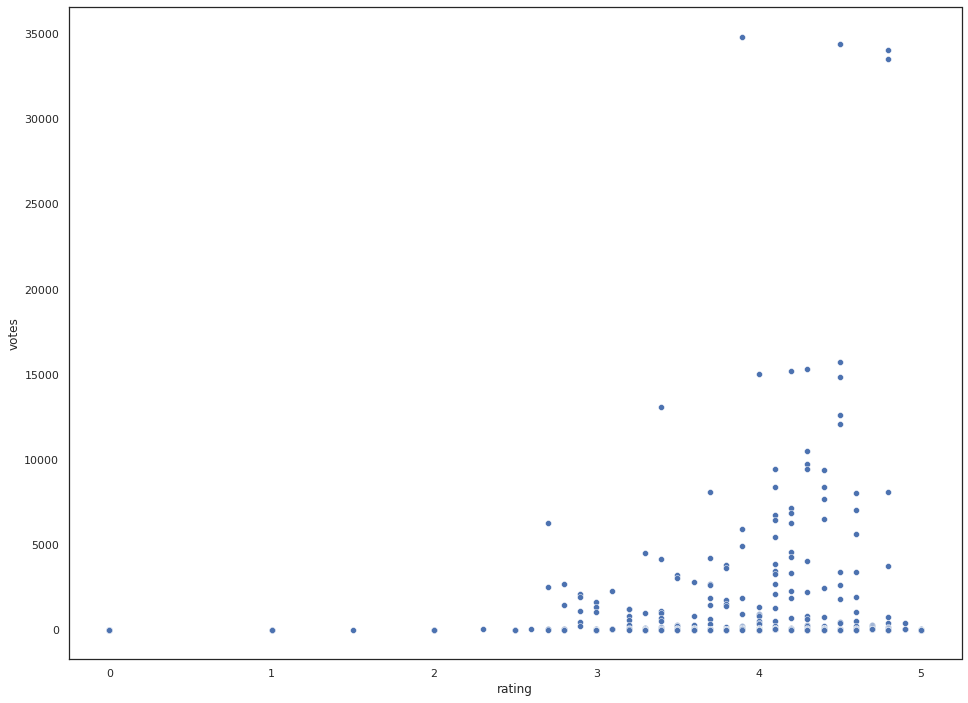

In [188]:
# Number of votes ralated to the ratings
sns.scatterplot(data=fandango, x="rating", y="votes");

## Correlation between the Features

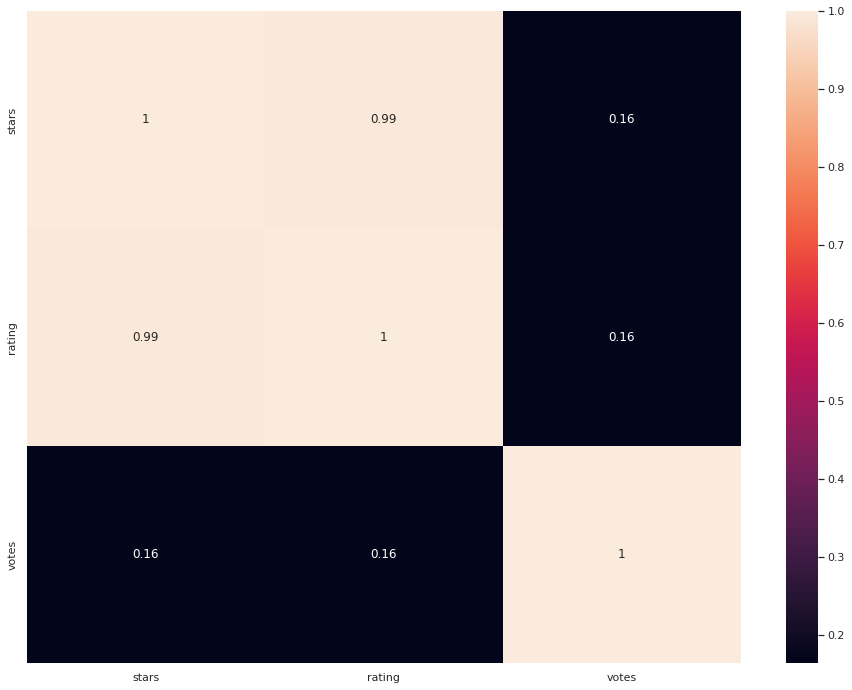

In [189]:
corr = fandango.corr()
corr

sns.heatmap(corr, annot=True);

In [190]:
fandango["year"] = fandango["film"].apply(lambda name: name.split("(",)[-1].split(")")[0])
fandango


,film,stars,rating,votes,year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


## Movies per Year

<AxesSubplot:xlabel='year', ylabel='Count'>

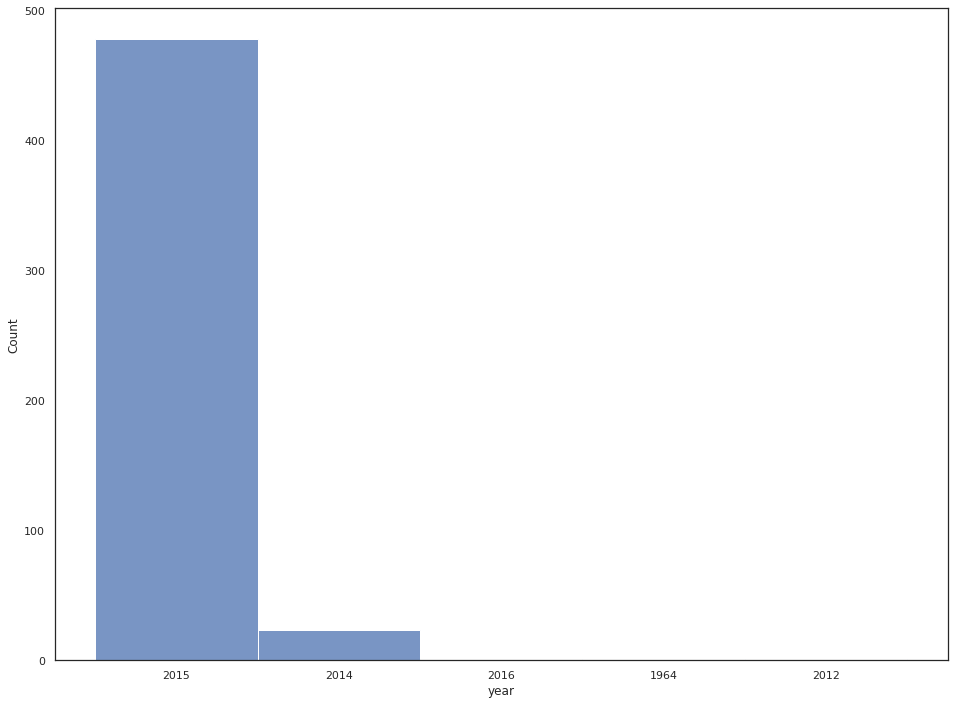

In [191]:
sns.histplot(data=fandango, x="year")

In [192]:

fandango.sort_values("votes", ascending=False).head(20)

,film,stars,rating,votes,year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


## Null Values

In [193]:
(fandango["votes"] == 0).value_counts()

False    435
True      69
Name: votes, dtype: int64

In [194]:
# check if it is possible to replace the null values 
fandango[fandango["votes"] == 0]

,film,stars,rating,votes,year
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


## Remove Null valuess

In [195]:
#after realizing that it is not possible, it is better to drop them from the df
fandango = fandango[fandango["votes"] > 0]
fandango

,film,stars,rating,votes,year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


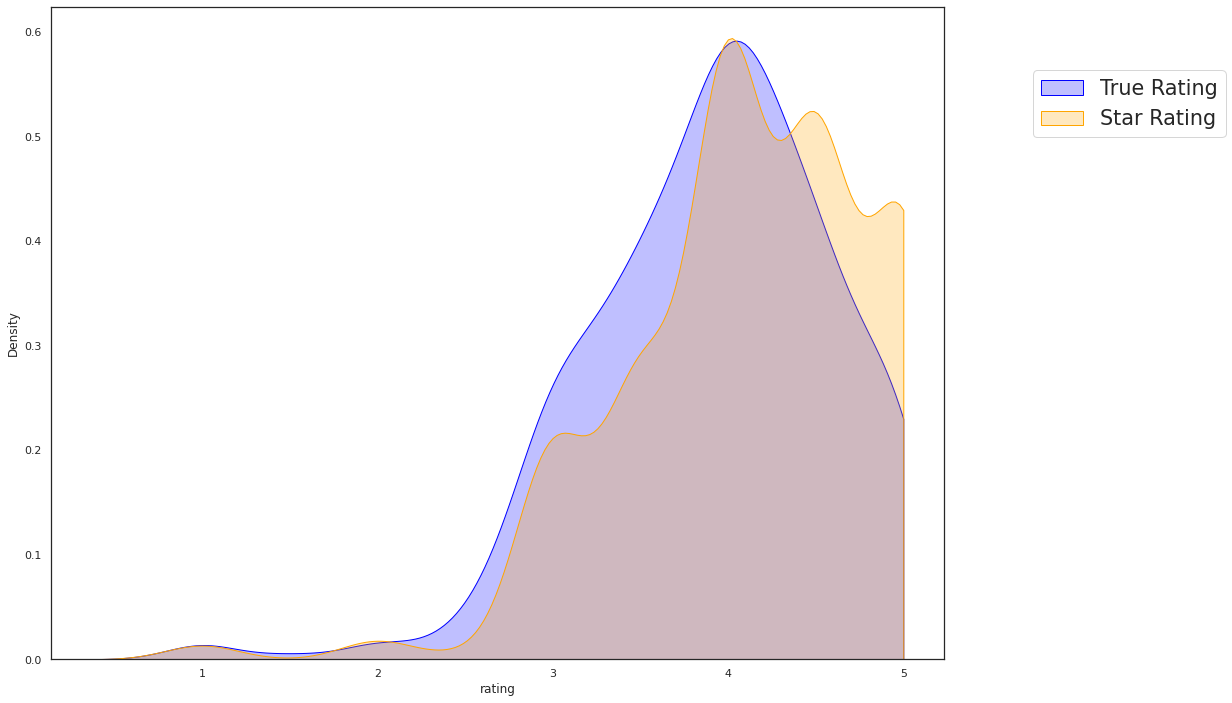

In [196]:
sns.kdeplot(data=fandango, x="rating", shade=True, clip=[0,5], fill=True,color="blue",label= "True Rating" )
sns.kdeplot(data=fandango, x="stars", shade=True, clip=[0,5], fill=True, color="orange", label= "Star Rating")
plt.legend(loc= (1.1,0.8), fontsize="xx-large");


## comparison between the stars and the true rating

In [197]:
fandango["diff"] = fandango["stars"] - fandango["rating"]
fandango["diff"] = fandango["diff"].round(2)
fandango

/tmp/ipykernel_11530/942177274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango["diff"] = fandango["stars"] - fandango["rating"]
/tmp/ipykernel_11530/942177274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango["diff"] = fandango["diff"].round(2)


,film,stars,rating,votes,year,diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


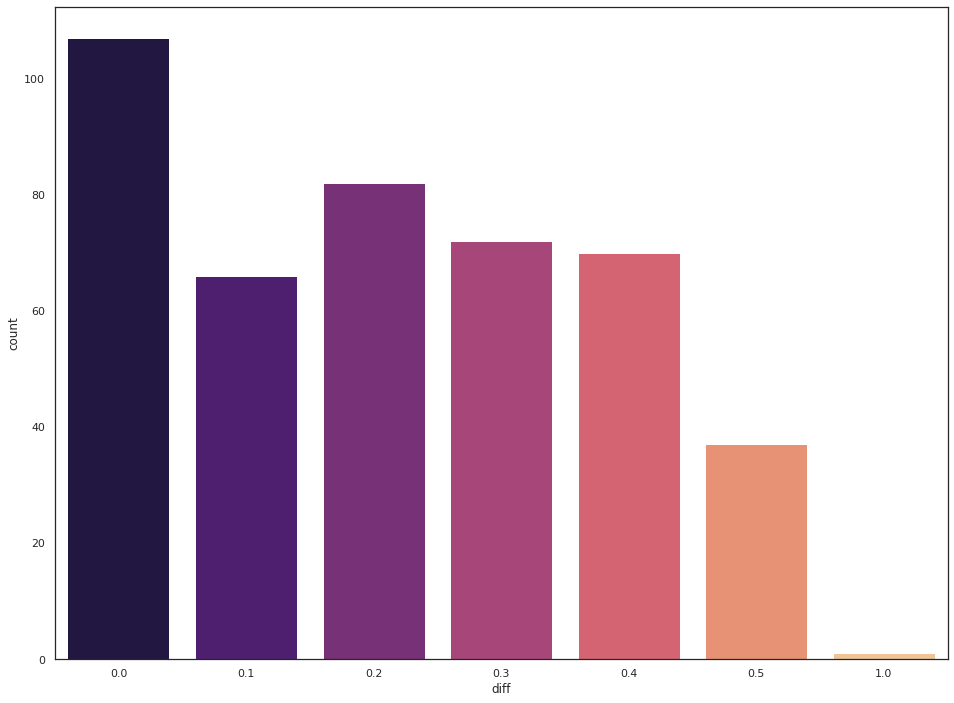

In [198]:
sns.countplot(data=fandango, x="diff", palette="magma");

In [199]:
# There is one outlier that has a one star difference
fandango[fandango["diff"] == 1]

,film,stars,rating,votes,year,diff
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# Comparison with the other sites

In [200]:
all_sites = pd.read_csv("all_sites_scores.csv")
all_sites.columns = map(str.lower, all_sites.columns)

**TASK: Explore the DataFrame columns, info, description.**

In [201]:
all_sites.head()

,film,rottentomatoes,rottentomatoes_user,metacritic,metacritic_user,imdb,metacritic_user_vote_count,imdb_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [202]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   film                        146 non-null    object 
 1   rottentomatoes              146 non-null    int64  
 2   rottentomatoes_user         146 non-null    int64  
 3   metacritic                  146 non-null    int64  
 4   metacritic_user             146 non-null    float64
 5   imdb                        146 non-null    float64
 6   metacritic_user_vote_count  146 non-null    int64  
 7   imdb_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [203]:
all_sites.describe()

,rottentomatoes,rottentomatoes_user,metacritic,metacritic_user,imdb,metacritic_user_vote_count,imdb_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


## Rotten Tomatoes

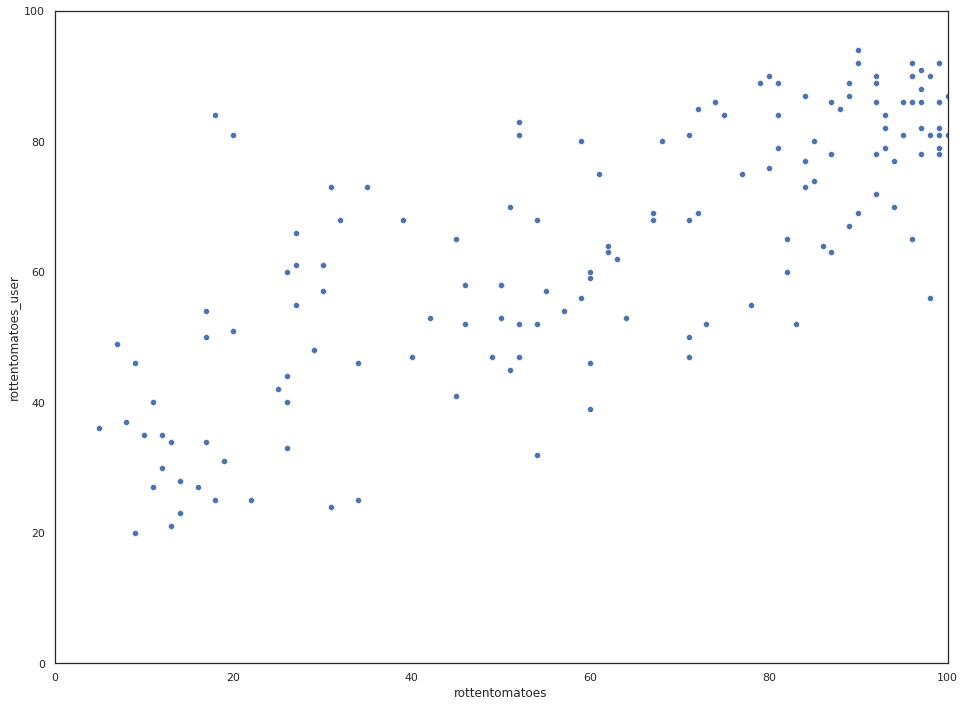

In [204]:
sns.scatterplot(data=all_sites, x= "rottentomatoes", y="rottentomatoes_user" )
plt.xlim(0,100)
plt.ylim(0,100);

## Diff between critics and user ratings of Rotten Tomatoes

In [205]:
rtd = all_sites["rottentomatoes"] - all_sites["rottentomatoes_user"]
all_sites.insert(3, "rtd", rtd)

In [206]:
all_sites

,film,rottentomatoes,rottentomatoes_user,rtd,metacritic,metacritic_user,imdb,metacritic_user_vote_count,imdb_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,-12,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,5,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,-10,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,-66,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,-14,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,9,67,7.9,7.4,33,7367
142,'71 (2015),97,82,15,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,19,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,19,90,7.3,7.8,19,1955


In [207]:
all_sites["rtd"].abs().mean()

15.095890410958905

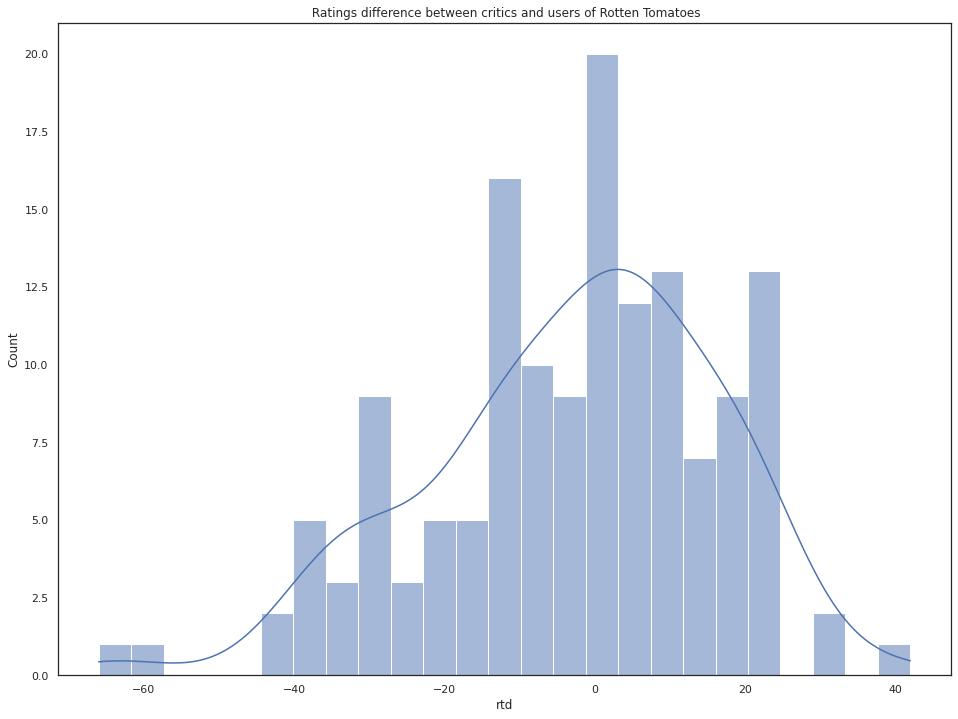

In [208]:
sns.histplot(data=all_sites, x= "rtd", kde=True, bins=25)
plt.title(" Ratings difference between critics and users of Rotten Tomatoes");

In [209]:
rtd_abs = all_sites["rtd"].abs()
all_sites.insert(3, "rtda", rtd_abs)

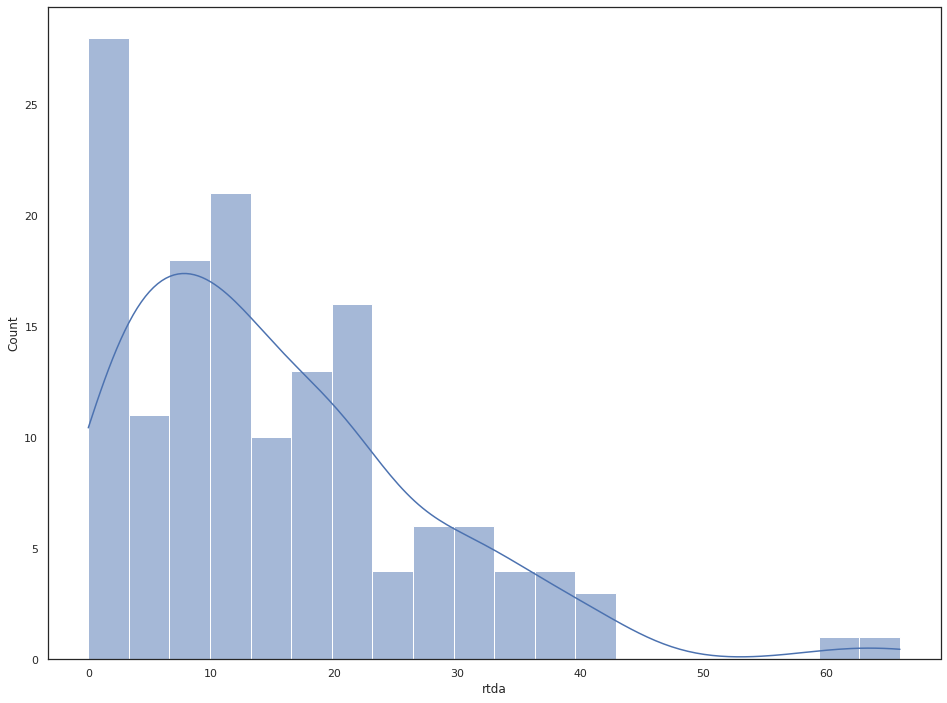

In [210]:
sns.histplot(data=all_sites, x="rtda", kde=True, bins=20);

## Largest difference of ratings in Rotten Tomatoes

In [211]:
all_sites.nsmallest(5, "rtd")[["film", "rottentomatoes", "rottentomatoes_user", "rtd"]]

,film,rottentomatoes,rottentomatoes_user,rtd
3,Do You Believe? (2015),18,84,-66
85,Little Boy (2015),20,81,-61
105,Hitman: Agent 47 (2015),7,49,-42
134,The Longest Ride (2015),31,73,-42
125,The Wedding Ringer (2015),27,66,-39


In [212]:
all_sites.nlargest(5, "rtd")[["film", "rottentomatoes", "rottentomatoes_user", "rtd"]]

,film,rottentomatoes,rottentomatoes_user,rtd
69,Mr. Turner (2014),98,56,42
112,It Follows (2015),96,65,31
115,While We're Young (2015),83,52,31
37,Welcome to Me (2015),71,47,24
40,I'll See You In My Dreams (2015),94,70,24


## MetaCritic


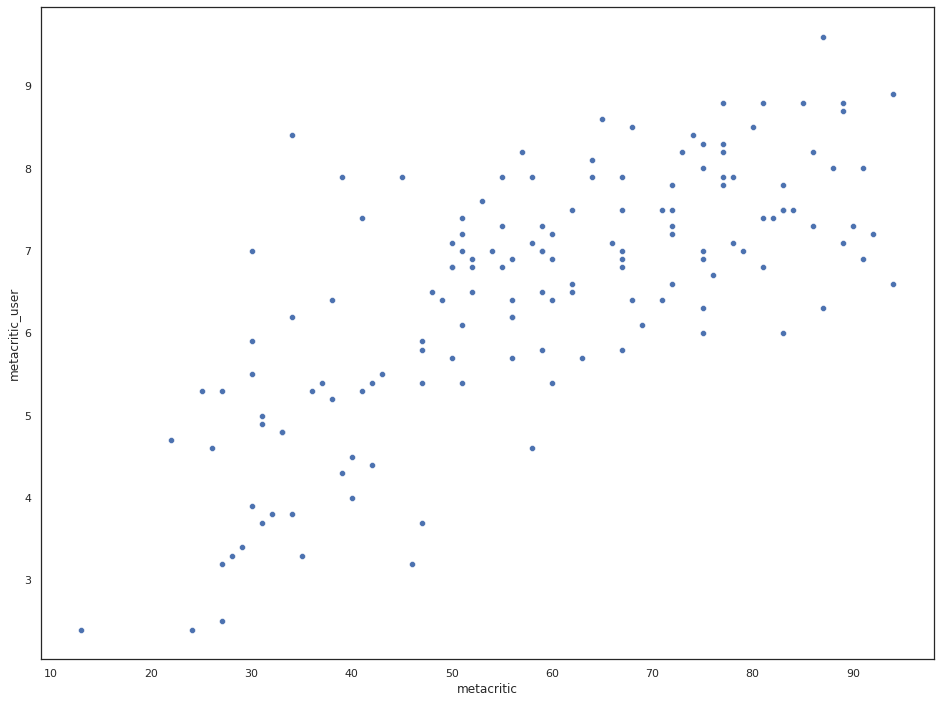

In [213]:
sns.scatterplot(data=all_sites, x="metacritic", y="metacritic_user");

In [214]:
all_sites["metacritic_user"]  = all_sites["metacritic_user"] * 10
all_sites["metacritic_user"] = all_sites["metacritic_user"].astype(int) 

## Diff between critics and user ratings of Metacritic

In [215]:
mtd = all_sites["metacritic"] - all_sites["metacritic_user"]
all_sites.insert(7, "mtd",mtd)
mtd_abs = all_sites["mtd"].abs()
all_sites.insert(7, "mtda", mtd_abs)
all_sites

,film,rottentomatoes,rottentomatoes_user,rtda,rtd,metacritic,metacritic_user,mtda,mtd,imdb,metacritic_user_vote_count,imdb_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,12,-12,66,71,5,-5,7.8,1330,271107
1,Cinderella (2015),85,80,5,5,67,75,8,-8,7.1,249,65709
2,Ant-Man (2015),80,90,10,-10,64,81,17,-17,7.8,627,103660
3,Do You Believe? (2015),18,84,66,-66,22,47,25,-25,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,14,-14,29,34,5,-5,5.1,88,19560
...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,9,9,67,79,12,-12,7.4,33,7367
142,'71 (2015),97,82,15,15,83,75,8,8,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,19,19,89,88,1,1,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,19,19,90,73,17,17,7.8,19,1955


In [217]:
all_sites["mtd"].abs().mean()

11.917808219178083

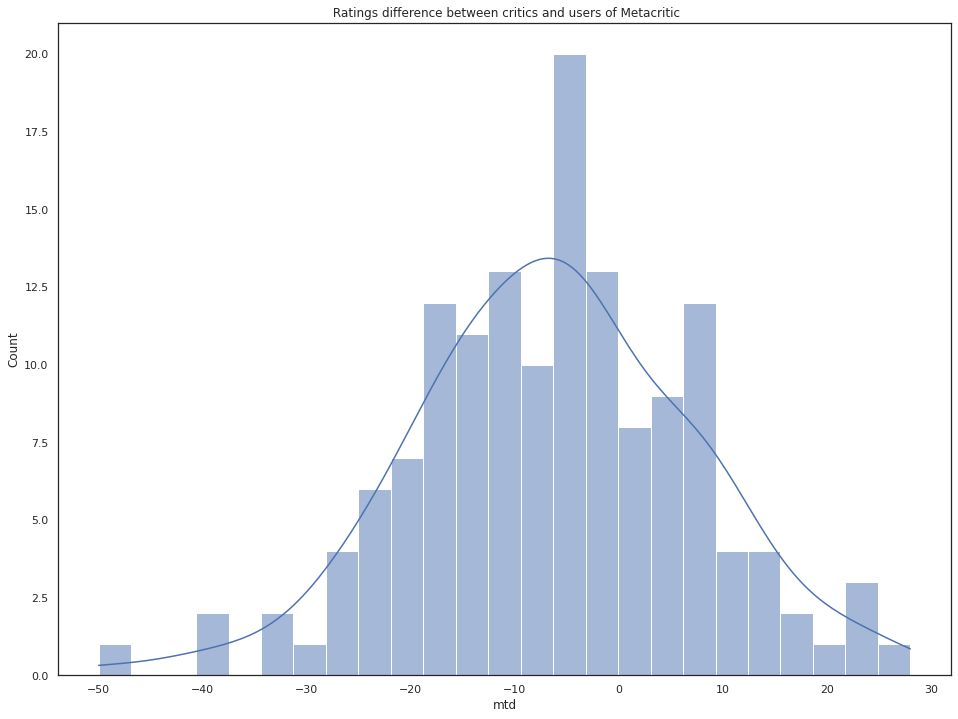

In [218]:
sns.histplot(data=all_sites, x= "mtd", kde=True, bins=25)
plt.title(" Ratings difference between critics and users of Metacritic");

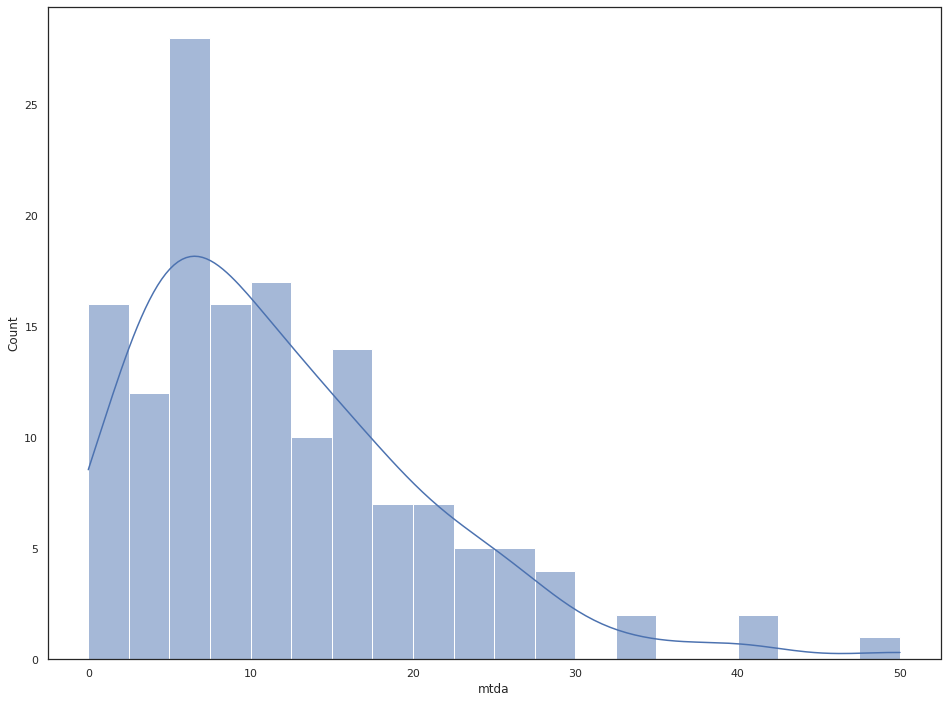

In [219]:
sns.histplot(data=all_sites, x="mtda", kde=True, bins=20);

In [221]:
all_sites.nsmallest(5, "mtd")[["film", "metacritic", "metacritic_user", "mtd"]]

,film,metacritic,metacritic_user,mtd
83,Self/less (2015),34,84,-50
64,Dark Places (2015),39,79,-40
101,The Gallows (2015),30,70,-40
55,Black or White (2015),45,79,-34
78,Chappie (2015),41,74,-33


In [222]:
all_sites.nlargest(5, "mtd")[["film", "metacritic", "metacritic_user", "mtd"]]

,film,metacritic,metacritic_user,mtd
69,Mr. Turner (2014),94,66,28
43,The Diary of a Teenage Girl (2015),87,63,24
70,Seymour: An Introduction (2015),83,60,23
41,Timbuktu (2015),91,69,22
12,Leviathan (2014),92,72,20


## IMDB


In [223]:
all_sites.head()

,film,rottentomatoes,rottentomatoes_user,rtda,rtd,metacritic,metacritic_user,mtda,mtd,imdb,metacritic_user_vote_count,imdb_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,12,-12,66,71,5,-5,7.8,1330,271107
1,Cinderella (2015),85,80,5,5,67,75,8,-8,7.1,249,65709
2,Ant-Man (2015),80,90,10,-10,64,81,17,-17,7.8,627,103660
3,Do You Believe? (2015),18,84,66,-66,22,47,25,-25,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,14,-14,29,34,5,-5,5.1,88,19560


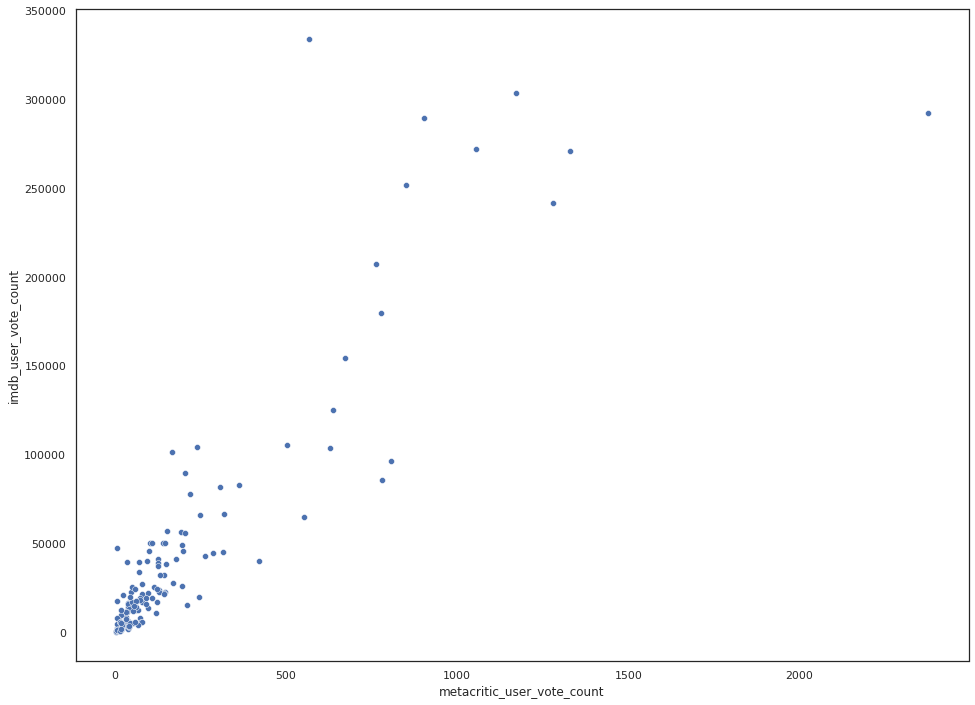

In [225]:
sns.scatterplot(data=all_sites,x="metacritic_user_vote_count",y="imdb_user_vote_count");

## Check the outliers

In [226]:
all_sites.nlargest(3, "imdb_user_vote_count")

,film,rottentomatoes,rottentomatoes_user,rtda,rtd,metacritic,metacritic_user,mtda,mtd,imdb,metacritic_user_vote_count,imdb_user_vote_count
14,The Imitation Game (2014),90,92,2,-2,73,82,9,-9,8.1,566,334164
65,Birdman (2014),92,78,14,14,88,80,8,8,7.9,1171,303505
88,Mad Max: Fury Road (2015),97,88,9,9,89,87,2,2,8.3,2375,292023


In [227]:
all_sites.nlargest(3, "metacritic_user_vote_count")

,film,rottentomatoes,rottentomatoes_user,rtda,rtd,metacritic,metacritic_user,mtda,mtd,imdb,metacritic_user_vote_count,imdb_user_vote_count
88,Mad Max: Fury Road (2015),97,88,9,9,89,87,2,2,8.3,2375,292023
0,Avengers: Age of Ultron (2015),74,86,12,-12,66,71,5,-5,7.8,1330,271107
130,Jurassic World (2015),71,81,10,-10,59,70,11,-11,7.3,1281,241807


## Fandago Scores vs. All Sites


In [229]:
full = pd.merge(left=fandango, right=all_sites, left_on="film", right_on="film")
full

,film,stars,rating,votes,year,diff,rottentomatoes,rottentomatoes_user,rtda,rtd,metacritic,metacritic_user,mtda,mtd,imdb,metacritic_user_vote_count,imdb_user_vote_count
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,17,-17,46,32,14,14,4.2,778,179506
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,10,-10,59,70,11,-11,7.3,1281,241807
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,13,-13,72,66,6,6,7.4,850,251856
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,3,-3,67,68,1,-1,7.4,764,207211
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,8,8,94,89,5,5,8.6,807,96252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,87,63,24,24,68,64,4,4,6.7,19,5289
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,95,81,14,14,87,63,24,24,7.0,18,1107
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,93,84,9,9,67,70,3,-3,7.8,4,732
143,Tangerine (2015),4.0,3.9,36,2015,0.1,95,86,9,9,86,73,13,13,7.4,14,696


# Create a DF with scores from 0-5 for all sites

In [231]:
df = full[["film", "stars", "rating", "rottentomatoes", "rottentomatoes_user", "metacritic", "metacritic_user", "imdb"]]
df

,film,stars,rating,rottentomatoes,rottentomatoes_user,metacritic,metacritic_user,imdb
0,Fifty Shades of Grey (2015),4.0,3.9,25,42,46,32,4.2
1,Jurassic World (2015),4.5,4.5,71,81,59,70,7.3
2,American Sniper (2015),5.0,4.8,72,85,72,66,7.4
3,Furious 7 (2015),5.0,4.8,81,84,67,68,7.4
4,Inside Out (2015),4.5,4.5,98,90,94,89,8.6
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,87,63,68,64,6.7
141,The Diary of a Teenage Girl (2015),4.0,3.6,95,81,87,63,7.0
142,The Wrecking Crew (2015),4.5,4.2,93,84,67,70,7.8
143,Tangerine (2015),4.0,3.9,95,86,86,73,7.4


In [237]:
df["rottentomatoes"] = np.round(df["rottentomatoes"]*5/100,1)
df["rottentomatoes_user"] = np.round(df["rottentomatoes_user"]*5/100,1)
df["metacritic"] = np.round(df["metacritic"]*5/100,1)
df["metacritic_user"] = np.round(df["metacritic_user"]*5/100,1)
df["imdb"] = np.round(df["imdb"]*5/10,1)

/tmp/ipykernel_11530/1751662843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rottentomatoes"] = np.round(df["rottentomatoes"]*5/100,1)
/tmp/ipykernel_11530/1751662843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rottentomatoes_user"] = np.round(df["rottentomatoes_user"]*5/100,1)
/tmp/ipykernel_11530/1751662843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [238]:
df

,film,stars,rating,rottentomatoes,rottentomatoes_user,metacritic,metacritic_user,imdb
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,4.8,4.3,4.3,3.6,3.7


### Score Distribution

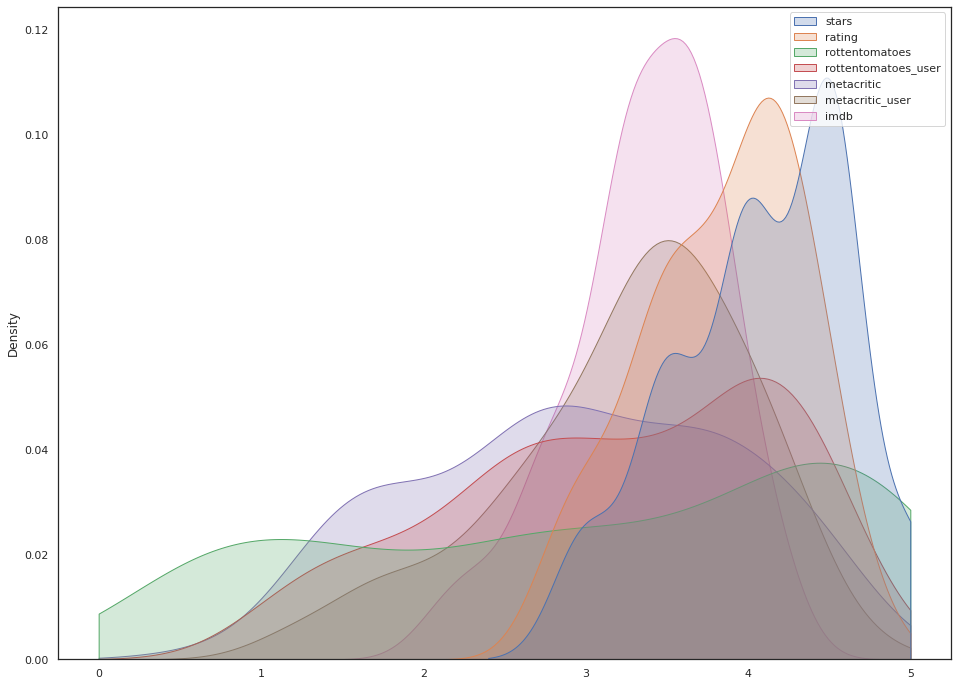

In [245]:
sns.kdeplot(data=df, shade=True, clip=[0,5]);


**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

**TASK: Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.**

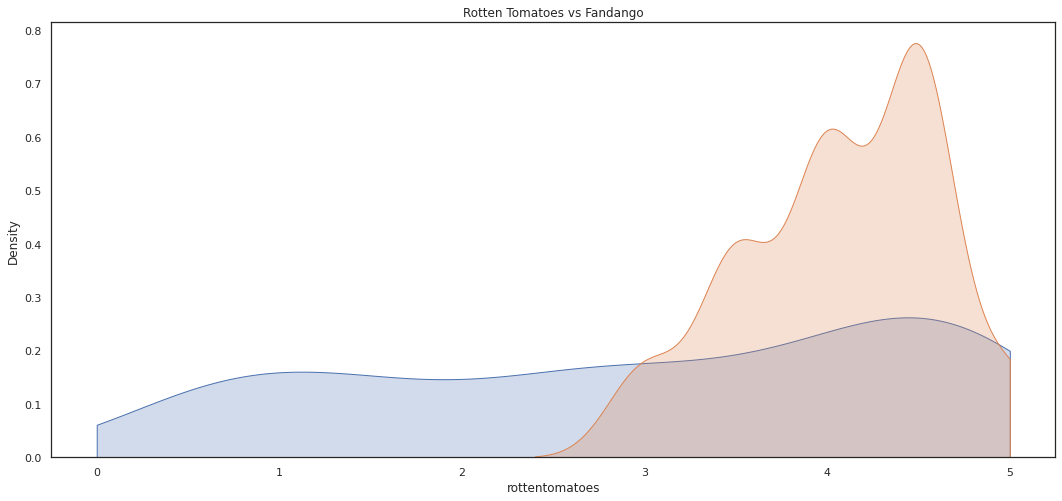

In [250]:
#CODE HERE
plt.figure(figsize=(18,8))
sns.kdeplot(data=df, x= "rottentomatoes", shade=True, clip=[0,5])
sns.kdeplot(data=df, x= "stars", shade=True, clip=[0,5])
plt.title("Rotten Tomatoes vs Fandango");

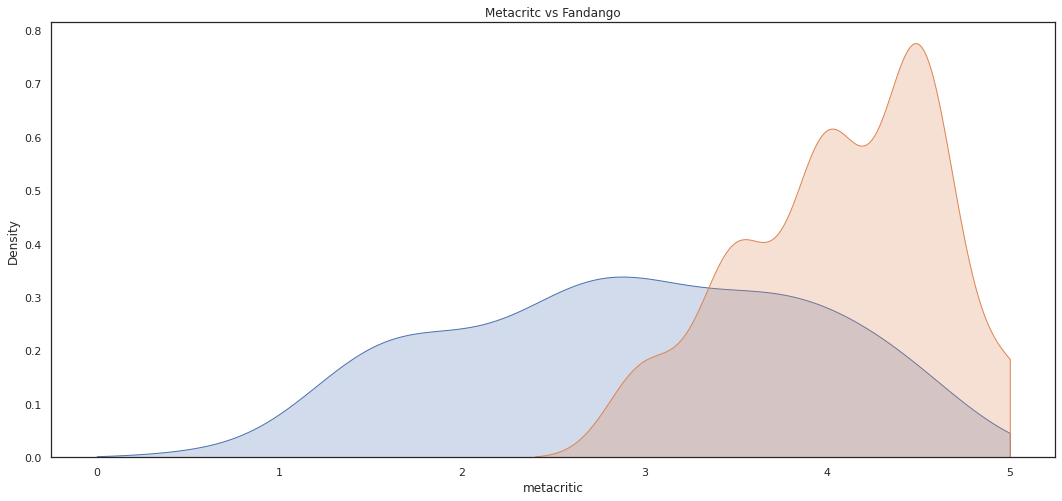

In [252]:
plt.figure(figsize=(18,8))
sns.kdeplot(data=df, x= "metacritic", shade=True, clip=[0,5])
sns.kdeplot(data=df, x= "stars", shade=True, clip=[0,5])
plt.title("Metacritc vs Fandango");

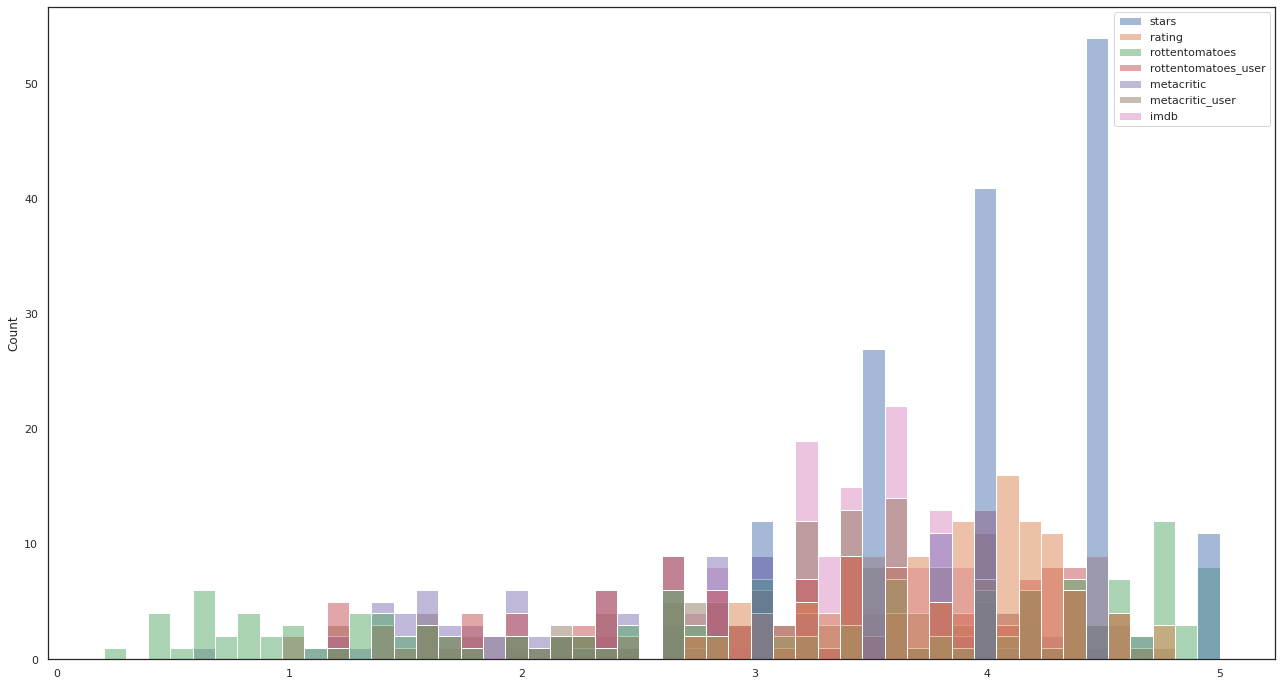

In [255]:
plt.figure(figsize=(22,12))
sns.histplot(df,bins=50);

In [256]:
df

,film,stars,rating,rottentomatoes,rottentomatoes_user,metacritic,metacritic_user,imdb
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,4.8,4.3,4.3,3.6,3.7
